<a href="https://colab.research.google.com/github/gsahonero/IBM3103-TA/blob/main/Colab%20Notebooks/IBM3103_TA_Session_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Welcome**
<center>

<h3>...to a new TA session for <b>IBM3103</b> (Mathematical Methods for Biomedical Engineering).</h3>

</center>

**Learning results** - After this class, you'll learn how to:
- Matrix inversion
- How to compute determinants
- Eigenvalues and eigenvectors properties



#Table of contents

- [Theoretical review](#matrix1)
- [Exercise 1 - Eigenvalues and eigenvectors of an arbitrary matrix](#matrix2)
- [Exercise 2 - Determinants properties](#matrix3)
- [Bonus track - Visualizing matrix transformations](#matrix4)

In [ ]:
#@title Preparations
using Plots
using LinearAlgebra
import Pkg; Pkg.add("BenchmarkTools")
using BenchmarkTools

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed BenchmarkTools ─ v1.6.0
    Updating `~/.julia/environments/v1.10/Project.toml`
  [6e4b80f9] + BenchmarkTools v1.6.0
    Updating `~/.julia/environments/v1.10/Manifest.toml`
  [6e4b80f9] + BenchmarkTools v1.6.0
  [9abbd945] + Profile
Precompiling packages...
   2609.2 ms  ✓ BenchmarkTools
  1 dependency successfully precompiled in 12 seconds. 460 already precompiled.


# Theoretical review
<a name="matrix1"></a>
Matrices have curious properties and some of the more interesting are based on the eigenvalue decomposition (EVD). Let's start by the definition of matrix inversion, basically, we have that for a matrix $A$, its inverse $A^{-1}$ satisfies

$$
AA^{-1} = I
$$

**However, how do we see this related to EVD?**

## Singularity and EVD

- A matrix is only invertible if all of its eigenvalues are non-zero. This is due to: $A^{-1} = \left(P^{-1} D P \right)^{-1} = PD^{-1}P^{-1}$ and if $D$ has zero values, then $D$ is singular.



Let's test this, with this matrix

In [ ]:
A = [1 2 3; 4 5 6; 7 8 9]
eigen_values, eigen_vectors = eigen(A)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
3-element Vector{Float64}:
 -1.1168439698070427
 -1.3036777264747022e-15
 16.116843969807043
vectors:
3×3 Matrix{Float64}:
 -0.78583     0.408248  -0.231971
 -0.0867513  -0.816497  -0.525322
  0.612328    0.408248  -0.818673

We have a very small eigenvalue, which is basically zero. So, $A$ is not invertible. Check it for yourself:

In [ ]:
# inv(A) # remove the first # to execute the cell

Julia tells us that $A$ is singular, i.e., it is not invertible. With a different matrix we can demonstrate the opposite:

In [ ]:
A = [1 2 1; 2 1 3; 1 3 1];
eigen_values, eigen_vectors = eigen(A);
inv_A = inv(A);

Check each of them by uncommenting:

In [ ]:
# eigen_values
# eigen_vectors
# inv_A

## EVD and Inversion

We may know that matrix inversion can take place through gaussian elimination or the adjoint method. But it can also be implemented through EVD

- If $A$ is a diagonalizable matrix, then $A^{-1} = P^{-1}D^{-1}P$. Since $D$ is a diagonal matrix, the inverse can be computed by $1/d_{ii}$, and then the inversion relies on the EVD only. Of course, we are just moving the inverse computation objective to the EVD computation, so we still need to do that, but the EVD can be done through other methods like the QR algorithm. Even so, we need to invert $P$.
- If $P$ is orthogonal, then $P^T = P^{-1}$, then $A^{-1} = P^T D^{-1} P$. Finally, we don't actually need to compute the inverse of $P$. $P$ is orthogonal when $A$ is symmetric.

Let's try this by finding the EVD of a matrix $A$ as follows

In [ ]:
A = [1 4 5; 6 2 1; 5 4 3]
eigen_values, eigen_vectors = eigen(A);
EVD_inv_A = eigen_vectors * diagm(1.0 ./eigen_values) * inv(eigen_vectors)

3×3 Matrix{Float64}:
  0.1    0.4  -0.3
 -0.65  -1.1   1.45
  0.7    0.8  -1.1

Compare it with the official inverse:

In [ ]:
inv(A)

3×3 Matrix{Float64}:
  0.1    0.4  -0.3
 -0.65  -1.1   1.45
  0.7    0.8  -1.1

Great. Well, probably not that great given that we still need the inverse to compute the inverse. Let's check what happens if we have a symmetric matrix.

In [ ]:
A = [1 2 3; 2 5 9; 3 9 1]
eigen_values, eigen_vectors = eigen(A)
EVD_inv_A = eigen_vectors * diagm(1.0 ./ eigen_values) * eigen_vectors'

3×3 Matrix{Float64}:
  4.47059   -1.47059   -0.176471
 -1.47059    0.470588   0.176471
 -0.176471   0.176471  -0.0588235

Compare it with the official inverse:

In [ ]:
inv(A)

3×3 Matrix{Float64}:
  4.47059   -1.47059   -0.176471
 -1.47059    0.470588   0.176471
 -0.176471   0.176471  -0.0588235

**There!** Now, we have completely avoided the computation of an inverse matrix. If you are curious, though, these processes are computationally comparable. The EVD approach is lighter and faster.

In [ ]:
@benchmark EVD_inv_A = eigen_vectors * diagm(1.0 ./ eigen_values) * eigen_vectors'

BenchmarkTools.Trial: 10000 samples with 214 evaluations per sample.
 Range (min … max):  343.196 ns … 46.822 μs  ┊ GC (min … max): 0.00% … 97.91%
 Time  (median):     413.643 ns              ┊ GC (median):    0.00%
 Time  (mean ± σ):   514.250 ns ±  1.234 μs  ┊ GC (mean ± σ):  8.98% ±  3.75%

    ▄ ▃██                                                       
  ▂▂█▅███▆▅▄▄▄▄▃▃▃▃▃▃▃▃▃▃▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂▂▂ ▃
  343 ns          Histogram: frequency by time          982 ns <

 Memory estimate: 512 bytes, allocs estimate: 6.

In [ ]:
@benchmark inv(A)

BenchmarkTools.Trial: 10000 samples with 14 evaluations per sample.
 Range (min … max):  846.071 ns … 505.164 μs  ┊ GC (min … max): 0.00% … 98.58%
 Time  (median):       1.053 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):     1.424 μs ±   6.714 μs  ┊ GC (mean ± σ):  6.55% ±  1.39%

     ▄█▇▂                                                        
  ▁▃▆████▄▂▁▁▁▁▁▁▁▁▁▁▁▂▂▂▂▂▃▃▄▄▃▃▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▂
  846 ns           Histogram: frequency by time         2.99 μs <

 Memory estimate: 1.86 KiB, allocs estimate: 4.

## Determinants and inversion

Determinants are fascinating. You just need to realize that it really resembles playing with numbers. In any case, there are a bunch of reasons why we care about determinants when we deal with matrix inversion.

- If $\text{det}(A)=0$, then $A$ is non-invertible.
- If $A$ is invertible, then $\text{det}(A^{-1}) = \frac{1}{\text{det}(A)}$

Julia provides a built-in function to calculate the determinant. So, let's try this things

In [ ]:
A = [1 2 3; 4 5 6; 7 8 9]
det(A)

0.0

That's right! This matrix $A$ as we saw earlier is non-invertible. But, what happens with a symmetric matrix?

In [ ]:
A = [1 2 3; 2 1 4; 3 4 1]
det(A)

20.0

Great! Moreover, to test the effect of the inversion we have

In [ ]:
println("The determinant of the inverse matrix is ", det(inv(A)))
println("The reciprocal of the determinant is ", 1.0/det(A))

The determinant of the inverse matrix is 0.04999999999999998
The reciprocal of the determinant is 0.05


Please, allow for some numerical imprecisions.

# Exercise 1 - Eigenvalues and eigenvectors of an arbitrary matrix
<a name = "matrix2"></a>
Considering the following matrix

$A = \begin{bmatrix}a_1& a_2& a_3 \\a_4 & a_5 & a_6 \\ a_7 & a_8 & a_9\end{bmatrix}$

1. Find the eigenvalues and eigenvectors if $a_2=a_4=1$, $a_7=a_3=2$, $a_8=a_6=3$
2. Prove that the rank of $A$ is related to the number of zero eigenvalues

## Solution 1
Let  
$
A = \begin{bmatrix}
a_1 & a_2 & a_3 \\
a_4 & a_5 & a_6 \\
a_7 & a_8 & a_9
\end{bmatrix}
$

Assume the constraints:  
$
a_2 = a_4,\quad a_7 = a_3,\quad a_8 = a_6
$

Under these conditions, the matrix becomes:
$
A = \begin{bmatrix}
a_1 & a_2 & a_3 \\
a_2 & a_5 & a_6 \\
a_3 & a_6 & a_9
\end{bmatrix}
$

This matrix is symmetric, i.e., $ A = A^\top$, which implies:
- It is diagonalizable.
- All eigenvalues are real.
- Eigenvectors corresponding to different eigenvalues are orthogonal.

To find the eigenvalues, compute:
$
\det(A - \lambda I) = 0
$

So:
$
\det\left(\begin{bmatrix}
a_1 - \lambda & a_2 & a_3 \\
a_2 & a_5 - \lambda & a_6 \\
a_3 & a_6 & a_9 - \lambda
\end{bmatrix}\right) = 0
$

Solving this gives a cubic equation in $ \lambda $. The solutions to this equation are the eigenvalues. Each eigenvalue $ \lambda_i $ can then be used to solve $ (A - \lambda_i I)\vec{v}_i = 0 $ to find the corresponding eigenvector $ \vec{v}_i $.


## Solution 2

We want to prove that the **rank of** $ A $ is related to the number of **zero eigenvalues**.

Let $ \lambda_1, \lambda_2, \lambda_3 $ be the eigenvalues of $ A $. Then:

- If $ \lambda_i = 0 $, then there exists a nonzero vector $ \vec{v}_i $ such that $ A\vec{v}_i = 0 $, so $ \vec{v}_i $ lies in the null space.
- The number of zero eigenvalues equals the **nullity** of $ A $.

By the rank-nullity theorem:
$
\text{rank}(A) + \text{nullity}(A) = n
$

So, if $k$ eigenvalues are zero:
$
\text{rank}(A) = 3 - k
$

# Exercise 2 - Determinants properties
<a name="matrix3"></a>
Given the following matrix
$A = \begin{bmatrix}a_1& a_2& a_3 \\a_4 & a_5 & a_6 \\ a_7 & a_8 & a_9\end{bmatrix}$

1. Find the value of $\text{det}(kA) + c\text{det}(A)$ if $k=2$ and $c=3$.
2. If $a_1 = a_5 = a_9 = 1$, $a_2=a_4=a_6=a_8=x$ and $a_7 = a_3 = 2x$, then what is the value of $\text{det}(kA)$ with $k=2$.

## Solution 1

Given:  
$
A = \begin{bmatrix}
a_1 & a_2 & a_3 \\
a_4 & a_5 & a_6 \\
a_7 & a_8 & a_9
\end{bmatrix}
$

Let $k = 2$, $c = 3$. Find:
$
\det(kA) + c\det(A)
$

Using the rule $\det(kA) = k^n \det(A)$, where \( n = 3 \):

$
\det(2A) = 2^3 \det(A) = 8\det(A)
$

Then:
$
\det(2A) + 3\det(A) = 8\det(A) + 3\det(A) = 11\det(A)
$


## Solution 2

Let
$$
A = \begin{bmatrix}
1 & x & 2x \\
x & 1 & x \\
2x & x & 1
\end{bmatrix}
$$

We want to compute $ \det(2A) $.

### Step 1: Compute $ \det(A) $

Use cofactor expansion along the first row:
$
\det(A) = 1 \cdot \begin{vmatrix}1 & x \\ x & 1\end{vmatrix}
- x \cdot \begin{vmatrix}x & x \\ 2x & 1\end{vmatrix}
+ 2x \cdot \begin{vmatrix}x & 1 \\ 2x & x\end{vmatrix}$

Now calculate each minor:

- $ \begin{vmatrix}1 & x \\ x & 1\end{vmatrix} = 1 - x^2 $
- $ \begin{vmatrix}x & x \\ 2x & 1\end{vmatrix} = x(1) - x(2x) = x - 2x^2 $
- $ \begin{vmatrix}x & 1 \\ 2x & x\end{vmatrix} = x(x) - 1(2x) = x^2 - 2x $

Putting it all together:
$$
\begin{aligned}
\det(A) &= 1(1 - x^2) - x(x - 2x^2) + 2x(x^2 - 2x) \\
&= 1 - x^2 - x^2 + 2x^3 + 2x^3 - 4x^2 \\
&= 1 - 6x^2 + 4x^3
\end{aligned}
$$

### Step 2: Multiply by $ 8 $ to get $ \det(2A) $

$$
\det(2A) = 8 \cdot \det(A) = 8(1 - 6x^2 + 4x^3) = 8 - 48x^2 + 32x^3
$$

<a name="matrix4"></a>
# Bonus track

## Plotting

Let's say that this is the vector $x=\begin{bmatrix}1 \\ 2 \\ 3\end{bmatrix}$

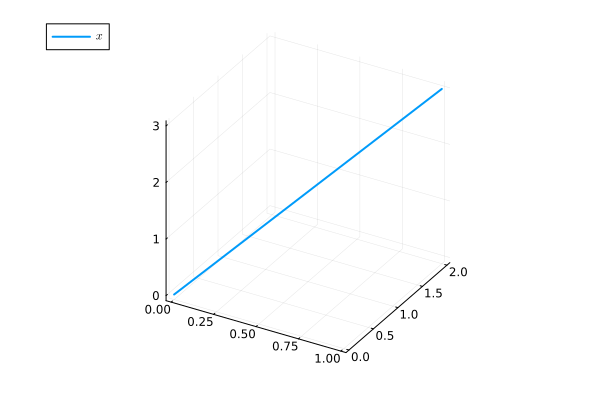

In [ ]:
x = [1, 2, 3]
plot([0, x[1]], [0, x[2]], [0, x[3]], arrow=true, linewidth=2, label="\$x\$")

Let's do some transformations with an interesting Hilbert kernel

$$
H = \begin{bmatrix}
\frac{1}{1+1-1} & \frac{1}{1+2-1} & \frac{1}{1+3-1} \\
\frac{1}{2+1-1} & \frac{1}{2+2-1} & \frac{1}{2+3-1} \\
\frac{1}{3+1-1} & \frac{1}{3+2-1} & \frac{1}{3+3-1}
\end{bmatrix}
=
\begin{bmatrix}
1 & \frac{1}{2} & \frac{1}{3} \\
\frac{1}{2} & \frac{1}{3} & \frac{1}{4} \\
\frac{1}{3} & \frac{1}{4} & \frac{1}{5}
\end{bmatrix}.
$$

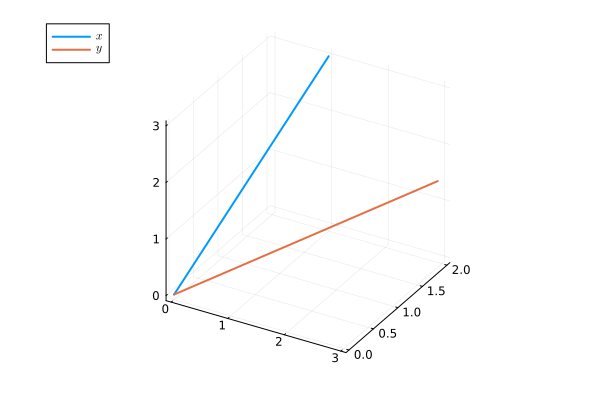

In [ ]:
H = [ 1      1/2    1/3;
      1/2    1/3    1/4;
      1/3    1/4    1/5 ]
y = H*x

plot([0, x[1]], [0, x[2]], [0, x[3]], arrow=true, linewidth=2, label="\$x\$")
plot!([0, y[1]], [0, y[2]], [0, y[3]], arrow=true, linewidth=2, label="\$y\$")

<a name="resources"> </a>
# Helpful resources
* Matrix inversion - https://www.math.ucdavis.edu/~linear/old/notes10.pdf
* Matrix algebra: Determinants, inverses and eigenvalues - https://twister.caps.ou.edu/OBAN2019/Intro_FEM_files/IFEM.AppC.pdf
* Linear Algebra and Matrix Inversion, Determinant of Matrix, Matrix Factorization: https://www3.nd.edu/~zxu2/acms40390F13/Lec-6.3-5.pdf
* Invertibility and Properties of Determinants: https://sites.lafayette.edu/thompsmc/files/2016/02/U1_S7.pdf